# Research Notebook
## Charlie Brooks
## Date: Jan 17

# 1: Experience
## Describe at least one research activity you worked on this week.

Used the given data from prof Hansen to perform a data reduction on the HV4 RR Lyrae star.

Accessed a one dimensional plot to observe the star for H-alpha particle absorption.

## Motivation:

The idea is to observe these stars H-alpha absorptions, the wavelength for these absorptions is very well known[1]. The H-alpha observed wavelength can then be compared to then find the speed of the source of the particles emitter ie. RR Lyrae star. The idea is then to use this data to be able to construct a rotation curve.



# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Worked through collaboratively to ensure the data reduction code was running as expected, troubleshooted errors that came along.

A tutorial of how to properly collect and reduce this data was given to us by our mentor, Dominik Plonka, and we were able to use it and adjust it to our specific parameters of our stars

First the code was ran to seperate the data into different kinds of frames (Bias, Flats, Arcs, Science)

Then it was reduced further to obtain the files for the next steps

In [5]:
echo ">>> Bias HV4 (2024-03-10 to 2024-03-12)"
dataselect $RAWFILES1 $RAWFILES2 --tags CAL \
  --expr "ad.object()=='Bias' \
          and ad.detector_roi_setting()=='Full Frame' \
          and ad.ut_date().isoformat() >= '2024-03-10' \
          and ad.ut_date().isoformat() <= '2024-03-12'" \
  -o "$LISTDIR/bias_HV4_20240310_12.lis"
check_list "$LISTDIR/bias_HV4_20240310_12.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/bias_HV4_20240310_12.lis" \
  | showd -d ut_date,object,exposure_time \
  | head

echo ">>> Flats HV4 (2024-03-10 to 2024-03-12)"
dataselect $RAWFILES1 $RAWFILES2 --tags CAL \
  --expr "$SETUP_EXPR \
          and ad.object()=='GCALflat' \
          and ad.detector_roi_setting()=='Full Frame' \
          and ad.ut_date().isoformat() >= '2024-03-10' \
          and ad.ut_date().isoformat() <= '2024-03-12'" \
  -o "$LISTDIR/flats_HV4_20240310_12.lis"
check_list "$LISTDIR/flats_HV4_20240310_12.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/flats_HV4_20240310_12.lis" \
  | showd -d ut_date,object,exposure_time

echo ">>> Arcs HV4 (2024-03-10 to 2024-03-12)"
dataselect $RAWFILES1 $RAWFILES2 --tags CAL \
  --expr "$SETUP_EXPR \
          and ad.object()=='CuAr' \
          and ad.detector_roi_setting()=='Full Frame' \
          and ad.ut_date().isoformat() >= '2024-03-10' \
          and ad.ut_date().isoformat() <= '2024-03-12'" \
  -o "$LISTDIR/arcs_HV4_20240310_12.lis"
check_list "$LISTDIR/arcs_HV4_20240310_12.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/arcs_HV4_20240310_12.lis" \
  | showd -d ut_date,object,exposure_time

echo ">>> Science HV4 (2024-03-10 to 2024-03-12)"
dataselect $RAWFILES1 $RAWFILES2 --xtags CAL \
  --expr "$SETUP_EXPR \
          and ad.object()=='HV4' \
          and ad.detector_roi_setting()=='Full Frame' \
          and ad.ut_date().isoformat() >= '2024-03-10' \
          and ad.ut_date().isoformat() <= '2024-03-12'" \
  -o "$LISTDIR/science_HV4_20240310_12.lis"
check_list "$LISTDIR/science_HV4_20240310_12.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/science_HV4_20240310_12.lis" \
  | showd -d ut_date,object,exposure_time

cd "$OUTDIR"
ulimit -n 4096

echo ">>> Reducing Bias HV4 (2024-03-10 to 2024-03-12)"
check_list "$LISTDIR/bias_HV4_20240310_12.lis"
reduce @"$LISTDIR/bias_HV4_20240310_12.lis"
caldb list | tail -n 20

echo ">>> Reducing Flats HV4 (2024-03-10 to 2024-03-12)"
check_list "$LISTDIR/flats_HV4_20240310_12.lis"
reduce @"$LISTDIR/flats_HV4_20240310_12.lis"
caldb list | tail -n 20

echo ">>> Reducing Arcs HV4 (2024-03-10 to 2024-03-12)"
check_list "$LISTDIR/arcs_HV4_20240310_12.lis"
reduce @"$LISTDIR/arcs_HV4_20240310_12.lis"
caldb list | tail -n 20

echo ">>> Reducing Science HV4"
check_list "$LISTDIR/science_HV4_20240310_12.lis"
reduce --ql

SyntaxError: invalid syntax (3083637629.py, line 1)

# 3: So what? (What does it mean?)

We were able to take the biasses, flats, arcs and science frames and reduce them properly to obtain these images:

You can see in the first image what appears to be the H-alpha absorption line at a wavelength of 656.295, we will be able to compare these wavelengths to calculate the speed of the source.

The other images depict a reduced flat, arc and, bias.

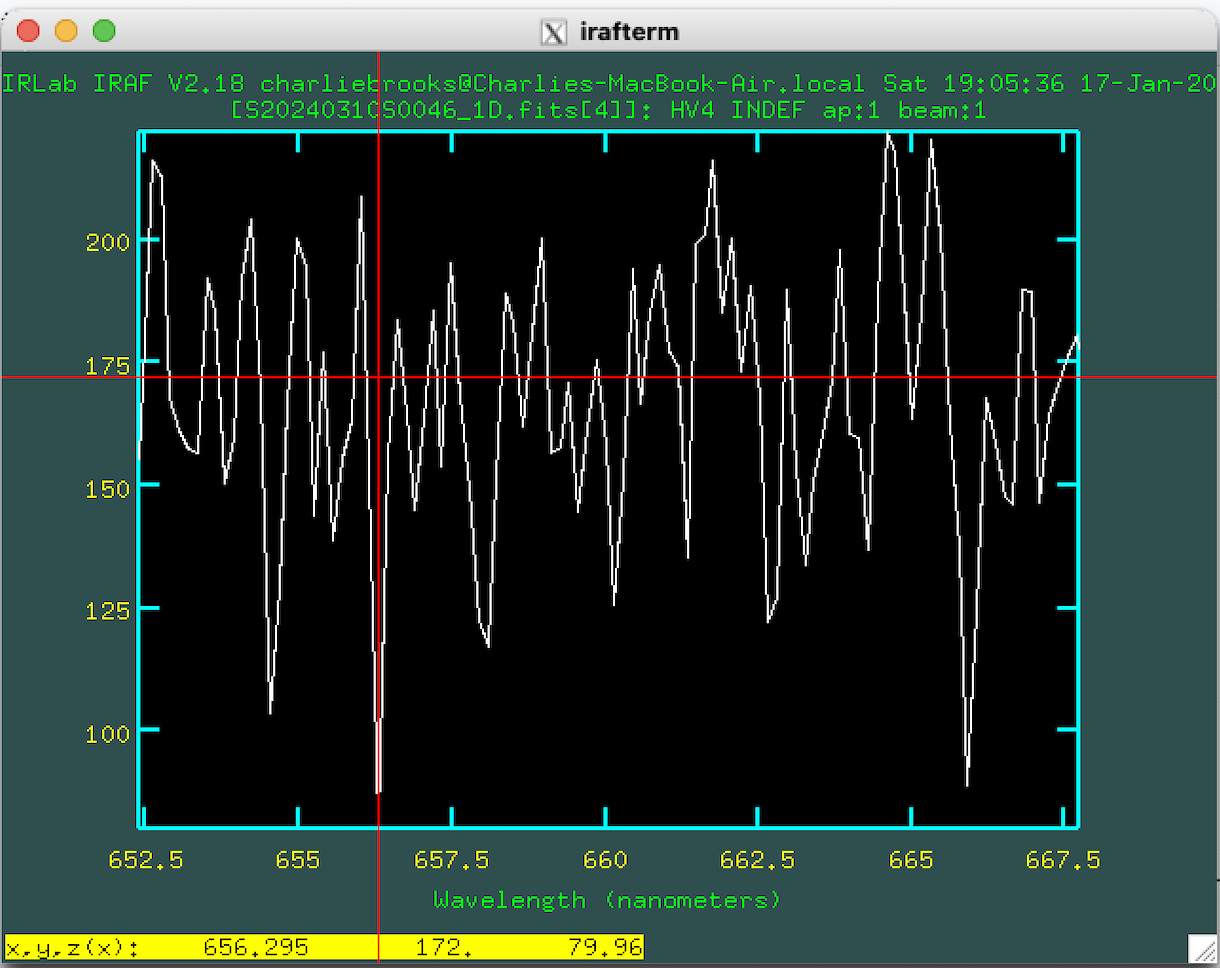

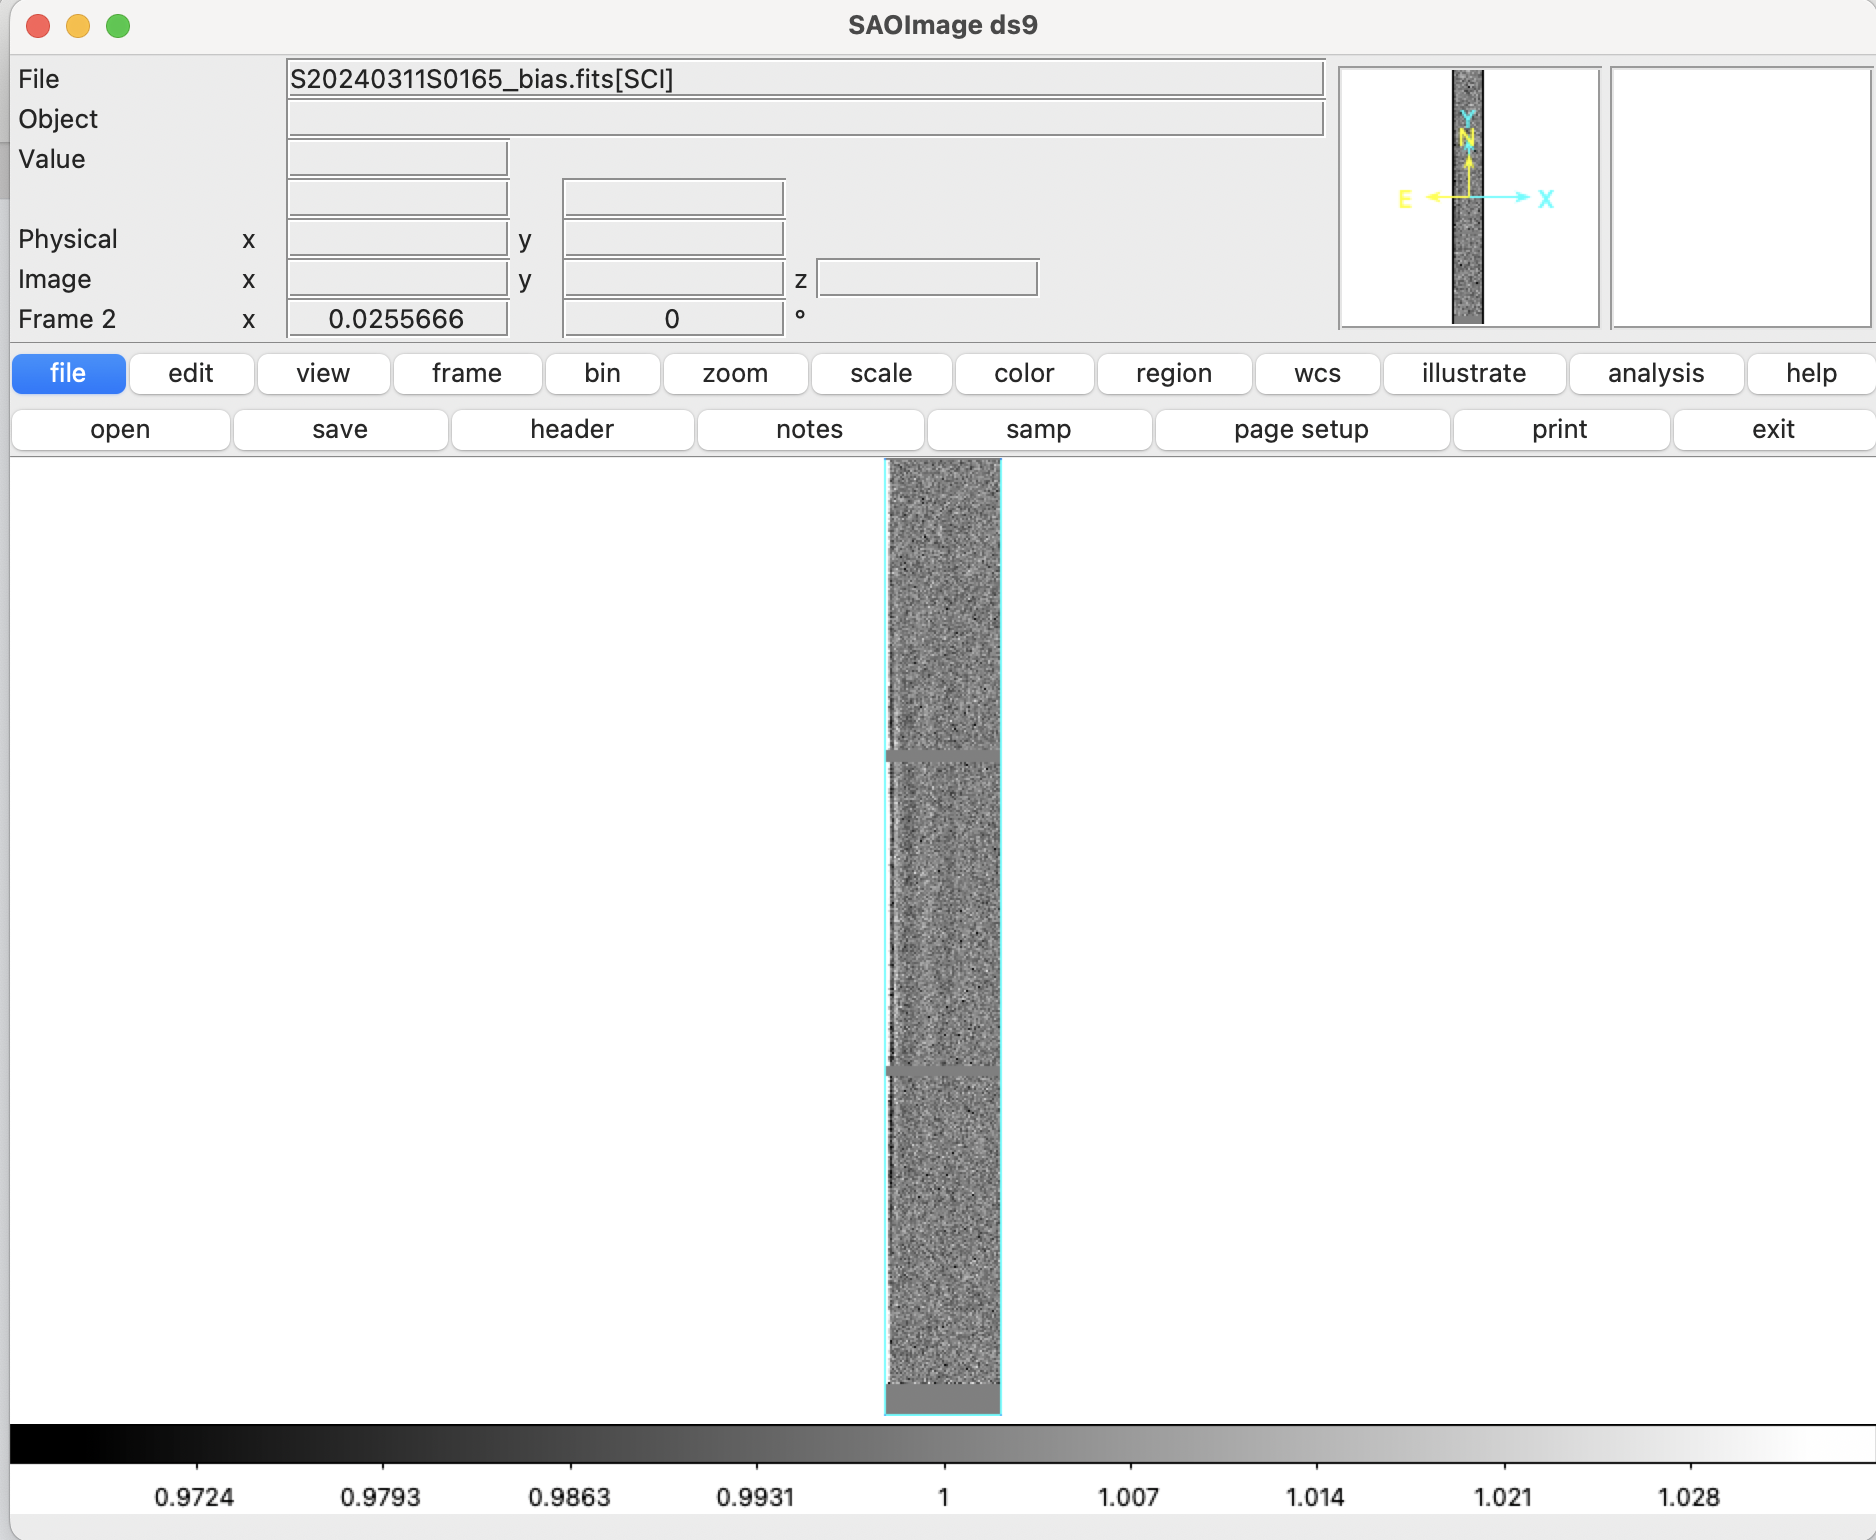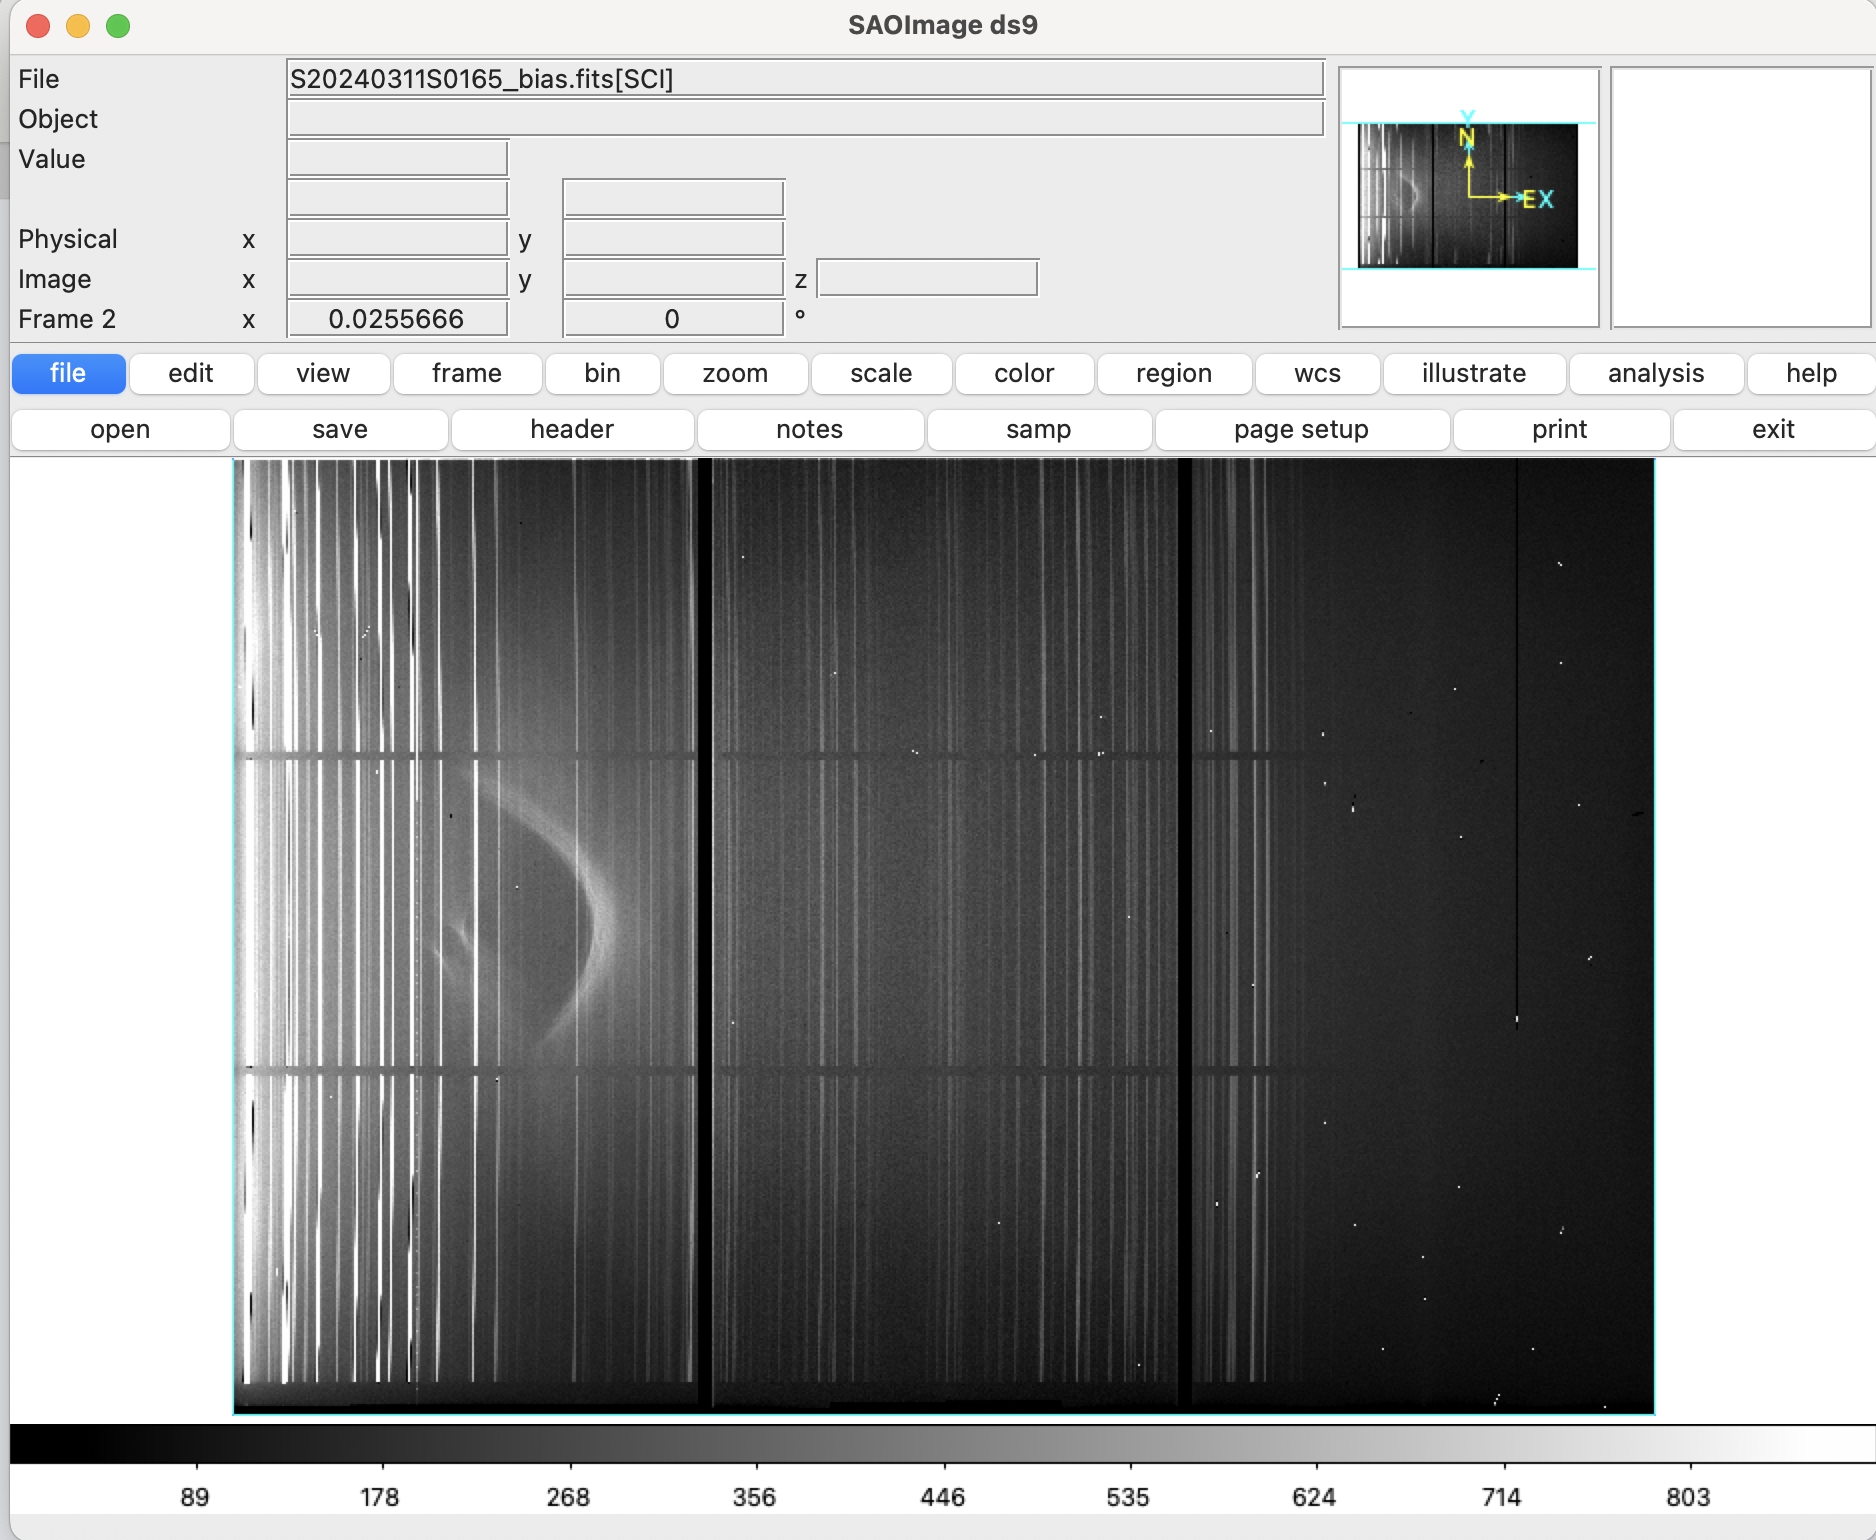

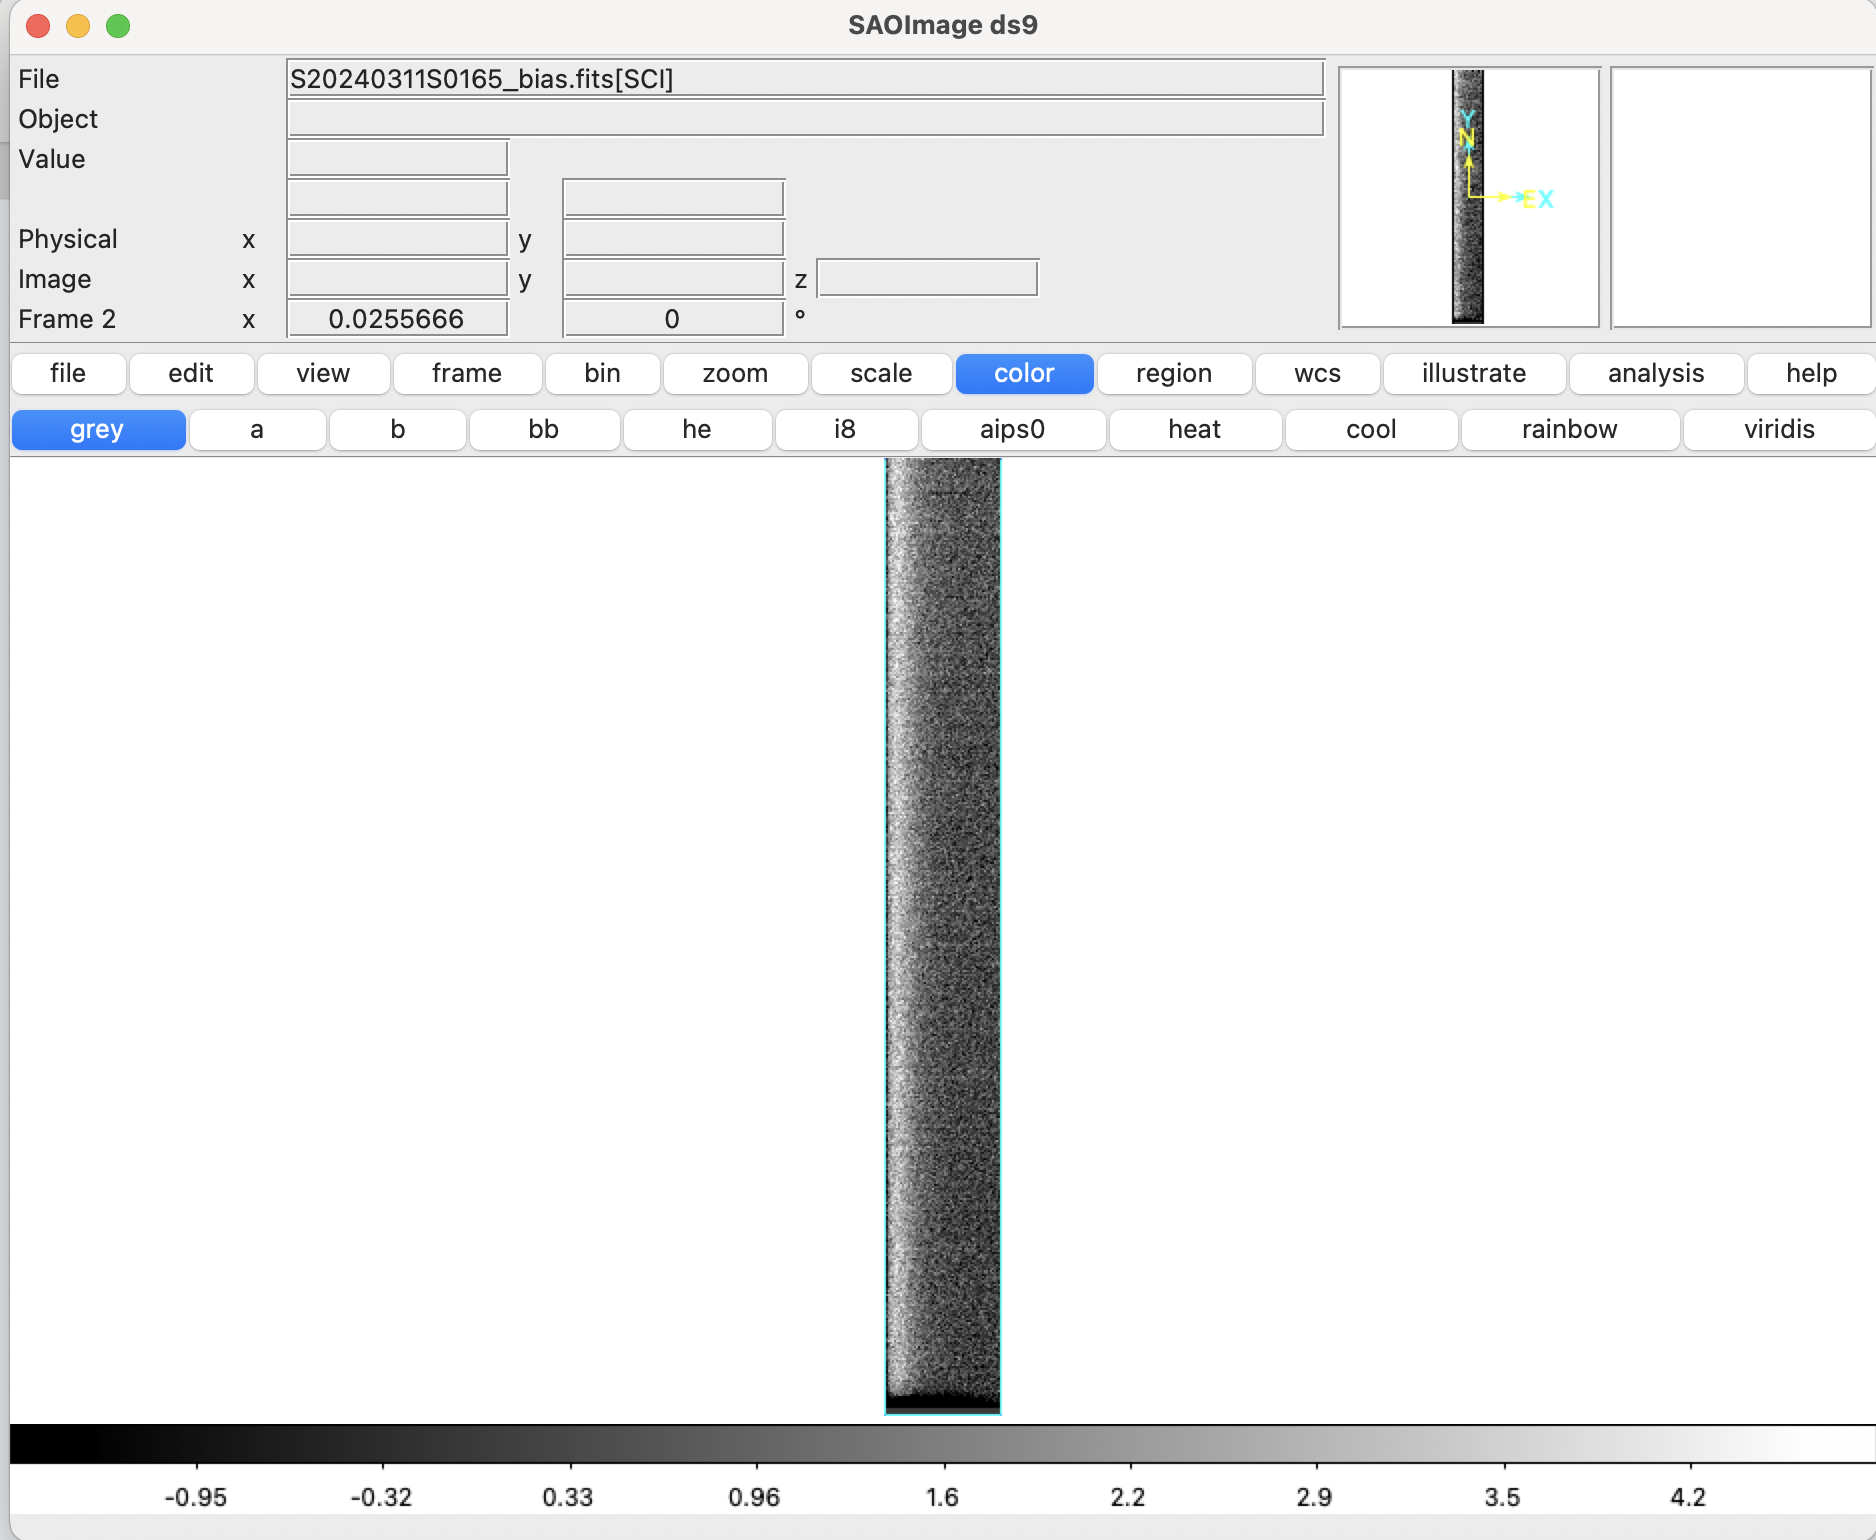

# 4. Now what? (What's next?)
## Plan for the next week

look into collecting data for RR Lyrae in the region of the Milky Way Bulge.

Begin to understand the concepts behind the plotting the rotation curve, ensure the velocities of the stars are computed correctly

# 5. Bibliography

[1] https://physics.nist.gov/PhysRefData/Handbook/Tables/hydrogentable2.htm

Dominik code:

```
################################################################################
# DRAGONS Reduction Script for GMOS Longslit RRLyrae
# This script performs a clean reduction of raw RAW FITS files using DRAGONS.
# It avoids mixing reduction output with raw data and includes checks.
#
#
# Dominik Plonka, Goethe University Frankfurt, 09.01.2025
# Prof. Dr. Camilla Hansen, Dr. Gustavo Medina Toledo
# EXPLORE VI
################################################################################

# -----------------------------------------------------------------------------
# 0) Environment and Setup
# -----------------------------------------------------------------------------

# Activate your DRAGONS conda Environment
echo ">>> Activating DRAGONS conda environment"
conda activate dragons

# Changing to working directory: WORKDIR
cd /Users/dominik/astro/DRAGONS/RRLyrae/redux/WORK

# Define project root and raw data paths
WORKDIR="/Users/dominik/astro/DRAGONS/RRLyrae/redux/WORK"
RAW1="/Users/dominik/astro/DRAGONS/RRLyrae/gemini_data"
RAW2="/Users/dominik/astro/DRAGONS/RRLyrae/gemini_data.GS-2024A-Q-318"

LISTDIR="$WORKDIR/lists"
OUTDIR="$WORKDIR/outputs"

# Check if all folders are defined
echo "WORKDIR=$WORKDIR"
echo "RAW1=$RAW1"
echo "RAW2=$RAW2"
echo "LISTDIR=$LISTDIR"
echo "OUTDIR=$OUTDIR"
ls -ld "$RAW1" "$RAW2" "$LISTDIR" "$OUTDIR"

# Clean working directory of previous outputs
echo ">>> Cleaning old processed files in OUTDIR"
rm -f "$OUTDIR"/*_bias*.fits "$OUTDIR"/*_flat*.fits "$OUTDIR"/*_arc*.fits "$OUTDIR"/*_std*.fits
rm -f "$OUTDIR"/*_crash.fits "$OUTDIR"/reduce.log
rm -rf "$OUTDIR"/calibrations



# -----------------------------------------------------------------------------
# 1) Calibration Database (caldb)
# -----------------------------------------------------------------------------

echo ">>> Initializing calibration database"
cat > ~/.dragons/dragonsrc <<EOF
[calibs]
databases = $WORKDIR/cal_manager.db get store
EOF

caldb init -w
caldb config

echo ">>> Adding BPM files to calibration database"
caldb add "$RAW1"/bpm*.fits
caldb add "$RAW1"/*bias.fits

caldb list



# -----------------------------------------------------------------------------
# 2) Generate Lists
# -----------------------------------------------------------------------------

die() { echo "ERROR: $*" >&2; return 1; }

check_list() {
  local f="$1"
  [[ -f "$f" ]] || die "List file not found: $f"
  local n
  n=$(grep -vE '^\s*#|^\s*$' "$f" | wc -l | tr -d ' ')
  echo ">>> CHECK: $(basename "$f") contains $n file(s)"
  [[ "$n" -gt 0 ]] || die "List is empty: $f"
}

# Define the raw data
RAWFILES2="$RAW2"/S*.fits

#SETUP_EXPR="disperser=='R400' and filter_name=='open' and focal_plane_mask=='1.0arcsec' and detector_x_bin==2 and detector_y_bin==2 and read_mode=='Normal' and read_speed_setting=='slow'"

# -----------------------------------------------------------------------------
# make lists for HV4 frames (2024-03-10 to 2024-03-12)
# -----------------------------------------------------------------------------

echo ">>> Bias HV4 (2024-03-10 to 2024-03-12)"
dataselect $RAWFILES1 $RAWFILES2 --tags CAL \
  --expr "ad.object()=='Bias' \
          and ad.detector_roi_setting()=='Full Frame' \
          and ad.ut_date().isoformat() >= '2024-03-10' \
          and ad.ut_date().isoformat() <= '2024-03-12'" \
  -o "$LISTDIR/bias_HV4_20240310_12.lis"
check_list "$LISTDIR/bias_HV4_20240310_12.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/bias_HV4_20240310_12.lis" \
  | showd -d ut_date,object,exposure_time \
  | head

echo ">>> Flats HV4 (2024-03-10 to 2024-03-12)"
dataselect $RAWFILES1 $RAWFILES2 --tags CAL \
  --expr "$SETUP_EXPR \
          and ad.object()=='GCALflat' \
          and ad.detector_roi_setting()=='Full Frame' \
          and ad.ut_date().isoformat() >= '2024-03-10' \
          and ad.ut_date().isoformat() <= '2024-03-12'" \
  -o "$LISTDIR/flats_HV4_20240310_12.lis"
check_list "$LISTDIR/flats_HV4_20240310_12.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/flats_HV4_20240310_12.lis" \
  | showd -d ut_date,object,exposure_time

echo ">>> Arcs HV4 (2024-03-10 to 2024-03-12)"
dataselect $RAWFILES1 $RAWFILES2 --tags CAL \
  --expr "$SETUP_EXPR \
          and ad.object()=='CuAr' \
          and ad.detector_roi_setting()=='Full Frame' \
          and ad.ut_date().isoformat() >= '2024-03-10' \
          and ad.ut_date().isoformat() <= '2024-03-12'" \
  -o "$LISTDIR/arcs_HV4_20240310_12.lis"
check_list "$LISTDIR/arcs_HV4_20240310_12.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/arcs_HV4_20240310_12.lis" \
  | showd -d ut_date,object,exposure_time

#echo ">>> Standards (LTT3218)"
#dataselect $RAWFILES1 $RAWFILES2 \
#  --expr "ad.object()=='LTT3218' and ad.obs_class()=='partnerCal'" \
#  -o "$LISTDIR/standards_LTT3218.lis"
#check_list "$LISTDIR/standards_LTT3218.lis"

check_list "$LISTDIR/standards_LTT3218.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/standards_LTT3218.lis" \
  | showd -d ut_date,object,exposure_time

echo ">>> Science HV4 (2024-03-10 to 2024-03-12)"
dataselect $RAWFILES1 $RAWFILES2 --xtags CAL \
  --expr "$SETUP_EXPR \
          and ad.object()=='HV4' \
          and ad.detector_roi_setting()=='Full Frame' \
          and ad.ut_date().isoformat() >= '2024-03-10' \
          and ad.ut_date().isoformat() <= '2024-03-12'" \
  -o "$LISTDIR/science_HV4_20240310_12.lis"
check_list "$LISTDIR/science_HV4_20240310_12.lis"
grep -vE '^\s*#|^\s*$' "$LISTDIR/science_HV4_20240310_12.lis" \
  | showd -d ut_date,object,exposure_time


# -----------------------------------------------------------------------------
# 3) Reduction Steps
# -----------------------------------------------------------------------------


cd "$OUTDIR"
ulimit -n 4096

echo ">>> Reducing Bias HV4 (2024-03-10 to 2024-03-12)"
check_list "$LISTDIR/bias_HV4_20240310_12.lis"
reduce @"$LISTDIR/bias_HV4_20240310_12.lis"
caldb list | tail -n 20

echo ">>> Reducing Flats HV4 (2024-03-10 to 2024-03-12)"
check_list "$LISTDIR/flats_HV4_20240310_12.lis"
reduce @"$LISTDIR/flats_HV4_20240310_12.lis"
caldb list | tail -n 20

echo ">>> Reducing Arcs HV4 (2024-03-10 to 2024-03-12)"
check_list "$LISTDIR/arcs_HV4_20240310_12.lis"
reduce @"$LISTDIR/arcs_HV4_20240310_12.lis"
caldb list | tail -n 20

echo ">>> Reducing Standards"
check_list "$LISTDIR/standards_LTT3218.lis"
reduce @"$LISTDIR/standards_LTT3218.lis"
caldb list | tail -n 20

echo ">>> Reducing Science HV4"
check_list "$LISTDIR/science_HV4_20240310_12.lis"
reduce --ql /Users/dominik/astro/DRAGONS/RRLyrae/gemini_data.GS-2024A-Q-318/S20240310S0046.fits
```